In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
import pandas as pd
%matplotlib inline

In [35]:
from scipy.stats import norm

In [2]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=ppy.gpu_utils._GPU_ACTIVE)

In [3]:
models = {}

models['mock_1'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_2'] =  ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.NormMDF([-0.25, 0.2]),
    ppy.dustmodels.LogNormDust([-0.5, 0.1]),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

tau_SFHbins = ppy.agemodels.TauModel(np.array([2.0, 3.0]), iso_step=-1).logSFH

models['mock_7'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.agemodels.NonParam(tau_SFHbins),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_8'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.agemodels.NonParam(tau_SFHbins),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_1'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),  # model SingleFeH with FixedWidthNormMDF
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_2'] = models['mock_3']  # model FixedWidthNormMDF with SingleFeH

models['mismatch_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),  
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),  # model SingleDust (Fdust=0.5) with FixedWidthLogNormDust
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5, dust_frac=0.5),  # model FixedWidthLogNormDust with SingleDust (Fdust=0.5)
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5, dust_frac=1.0),  # model Fdust=0.5 with Fdust=1.0
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(28.0)  # model has wrong distance
)

models['mismatch_7'] = models['mock_3']  # Exposure overestimated in model
models['mismatch_8'] = models['mock_3']  # mock has PSF 10% narrower
models['mismatch_9'] = models['mock_3']  # mock has PSF 10% narrower in F814W

models['mismatch_10'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.3, -0.25),  # model sig=0.1 with sig=0.3
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

In [4]:
run_names = {}
for i in range(1, 9):
    run_names['mock_{:d}'.format(i)] = 'Mock Test {:d}'.format(i)
run_names['mismatch_1'] = 'Model: MDF, Truth: Single [Fe/H]'
run_names['mismatch_2'] = 'Model: Single [Fe/H], Truth: MDF'

run_names['mismatch_3'] = 'Model: LogNorm Dust, Truth: Single Dust'
run_names['mismatch_4'] = 'Model: Single Dust, Truth: LogNorm Dust'
run_names['mismatch_5'] = 'Model: DustFrac = 1, Truth: DustFrac = 0.5'

run_names['mismatch_6'] = 'Model: Dmod=28, Truth: Dmod=26'
run_names['mismatch_7'] = 'Model: Overestimates Exposure Time by 5x'

run_names['mismatch_8'] = 'Model: Overestimates PSF width by 10%'
run_names['mismatch_9'] = 'Model: Overestimates F814W PSF width by 10%'

run_names['mismatch_10'] = 'Model: Overestimates MDF width (0.3 vs 0.1)'

In [5]:
models.keys()

dict_keys(['mock_1', 'mock_2', 'mock_3', 'mock_4', 'mock_5', 'mock_6', 'mock_7', 'mock_8', 'mismatch_1', 'mismatch_2', 'mismatch_3', 'mismatch_4', 'mismatch_5', 'mismatch_6', 'mismatch_7', 'mismatch_8', 'mismatch_9', 'mismatch_10'])

In [6]:
res = {}
for k in models.keys():
    try:
        res[k] = ppy.results.ResultsPlotter('results/paper1_{:s}.csv'.format(k), true_model=models[k], run_name=run_names[k])
    except:
        if k != 'mock_6':
            assert False

In [7]:
def plot_sets(run_names, chains_only=False, dmod_true=24.42, nonparam=False):
    nr = np.max([models[k]._num_params for k in run_names])
    if np.any([isinstance(models[k].age_model, ppy.agemodels.NonParam) for k in run_names]):
        nr += 1  # for Npix
    if not chains_only:
        nr += 3
    nx = len(run_names)
    fs = (5+3*nx, 2*nr)
    fig, axes = plt.subplots(ncols=nx, nrows=nr, figsize=fs, sharex=True, sharey='row')
    if nx == 1:
        axes = [axes]
    for i, n in enumerate(run_names):
        results = res[n]
        plot_axes = list(axes[:, i])
        if models[n].p_distance == 0:
            plot_axes.pop(models[n].p_total)
        results.plot_chains(axes=plot_axes, chains_only=chains_only)
    plt.tight_layout()
    return fig, axes

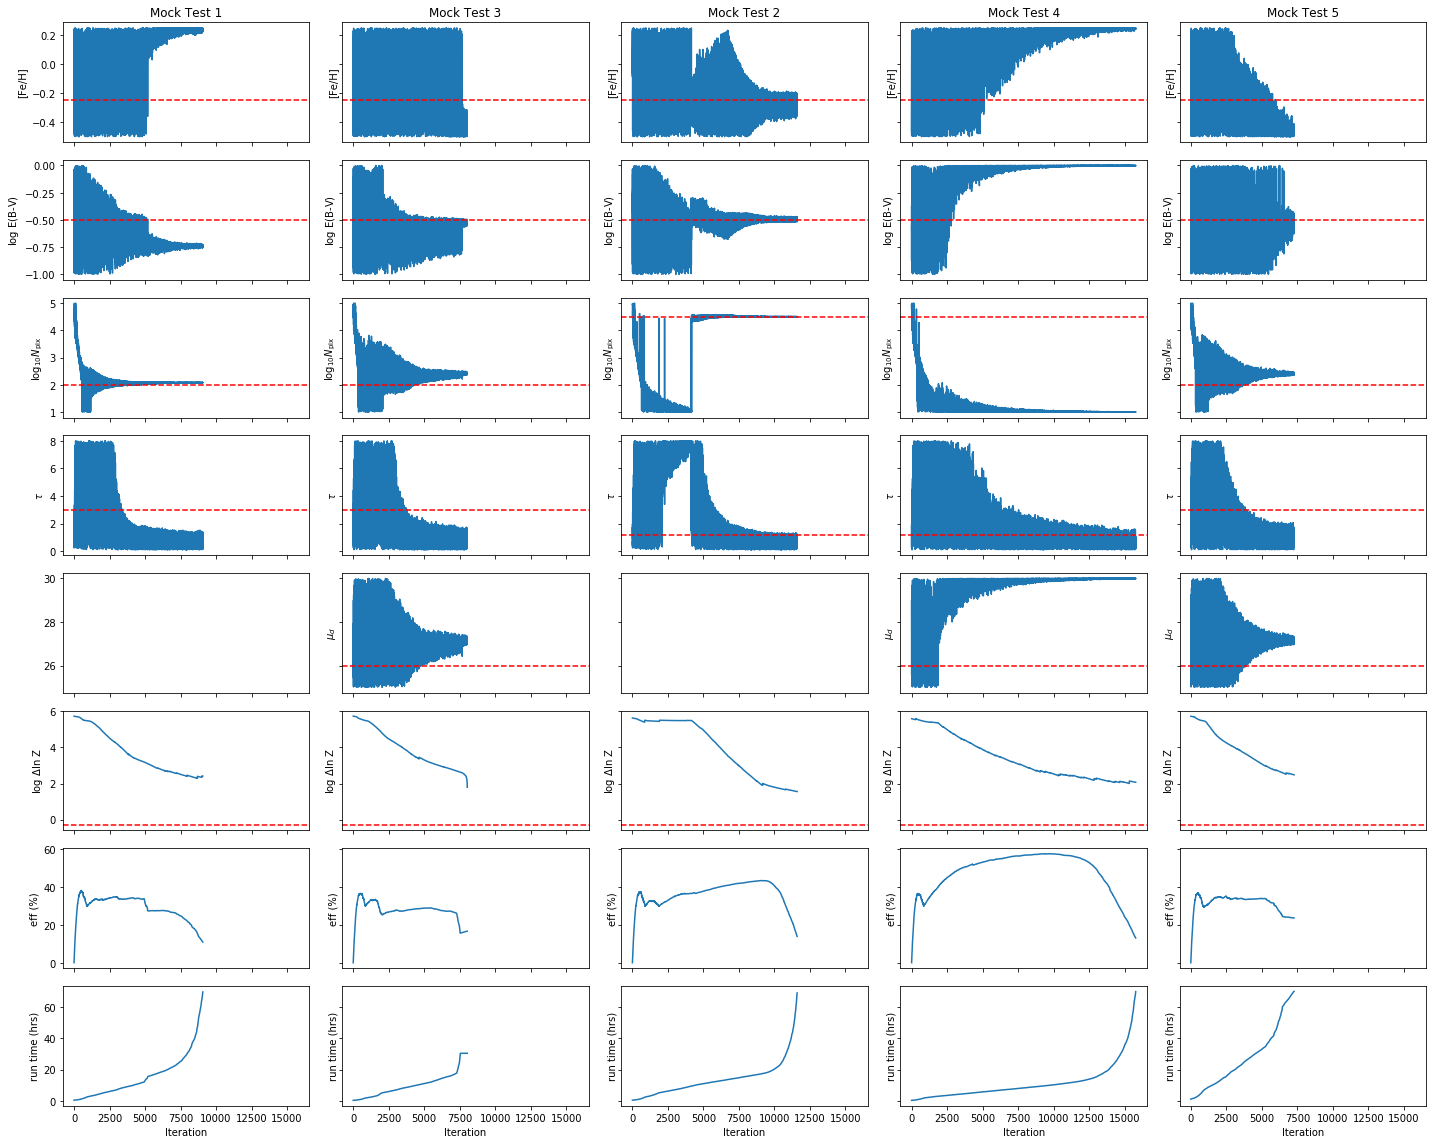

In [57]:
fig, axes = plot_sets(['mock_1', 'mock_3', 'mock_2', 'mock_4', 'mock_5'], chains_only=False);

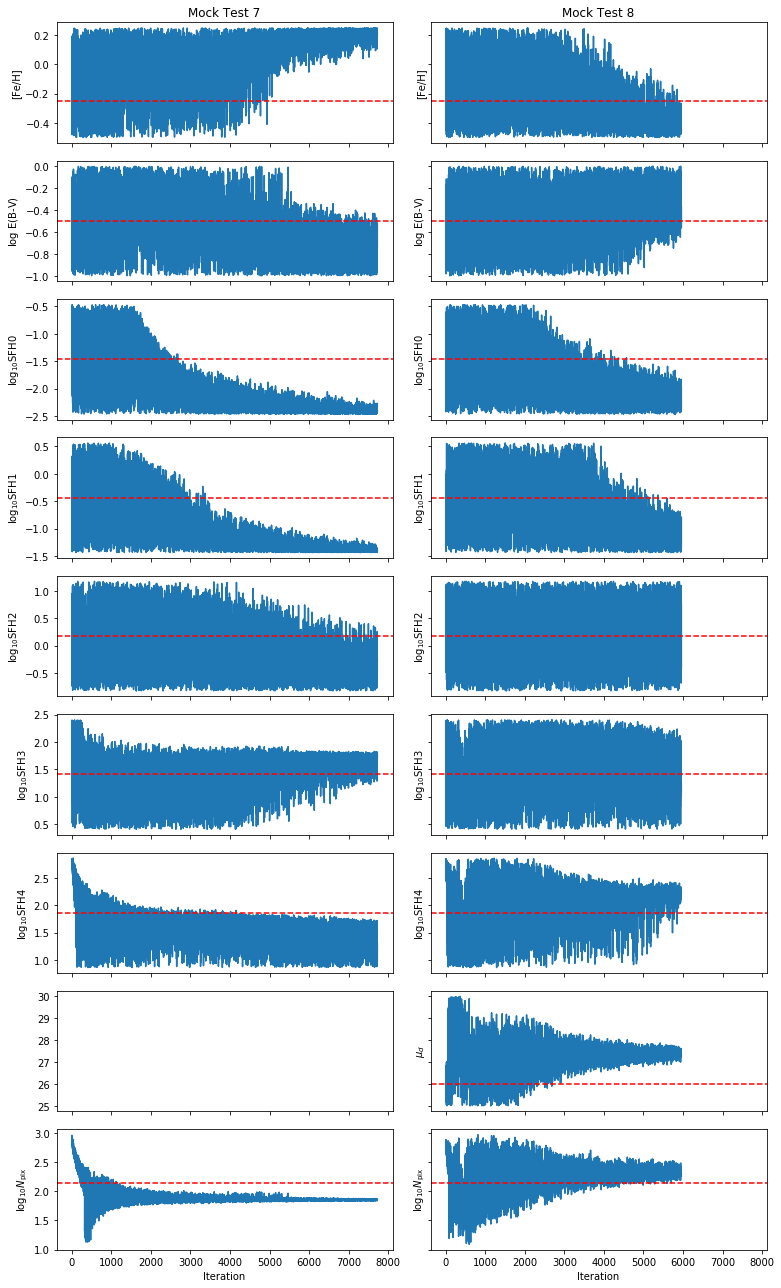

In [45]:
fig, axes = plot_sets(['mock_7', 'mock_8'], chains_only=True);

In [8]:
res['mock_1'].true_model

In [54]:
res['mock_4'].df

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,delta_logz,time_elapsed,logfeh,logdust,logNpix,tau,dmod,log_weights,weights
0,2000.0,1.0,1.0,0.19960,-553410.0,-553410.0,-0.001998,-553410.0,0.11750,6.9098,inf,0.317583,-0.459590,-0.548350,4.9280,1.07910,25.597,-482014.838669,0.000000
1,2000.0,2.0,1.0,0.39841,-552790.0,-552790.0,-0.003996,-552790.0,0.11751,6.9118,3.912300e+05,0.318278,-0.137710,-0.874670,4.8578,0.23450,28.383,-481394.838669,0.000000
2,2000.0,3.0,1.0,0.59642,-552750.0,-552760.0,-0.005994,-552760.0,0.11753,6.9137,3.906100e+05,0.318917,-0.052270,-0.371530,4.9306,1.49290,29.000,-481354.838669,0.000000
3,2000.0,4.0,1.0,0.79365,-552740.0,-552750.0,-0.007992,-552750.0,0.11755,6.9157,3.905700e+05,0.319528,-0.489510,-0.391020,4.9543,1.87040,27.936,-481344.838669,0.000000
4,2000.0,5.0,1.0,0.99010,-552560.0,-552570.0,-0.009990,-552570.0,0.11757,6.9177,3.905600e+05,0.320167,0.134550,-0.816740,4.6519,0.91885,25.634,-481164.838669,0.000000
5,2000.0,6.0,1.0,1.18580,-552540.0,-552550.0,-0.011988,-552550.0,0.11758,6.9198,3.903800e+05,0.320833,-0.426400,-0.561770,4.7899,0.42860,26.554,-481144.838669,0.000000
6,2000.0,7.0,1.0,1.38070,-552420.0,-552420.0,-0.013986,-552420.0,0.11760,6.9218,3.903600e+05,0.321444,-0.383550,-0.639010,4.8203,1.12830,26.364,-481024.838669,0.000000
7,2000.0,8.0,1.0,1.57480,-552340.0,-552350.0,-0.015984,-552350.0,0.11762,6.9238,3.902300e+05,0.322083,-0.219590,-0.598490,4.7004,2.03440,28.320,-480944.838669,0.000000
8,2000.0,9.0,1.0,1.76820,-552310.0,-552320.0,-0.017982,-552320.0,0.11763,6.9257,3.901600e+05,0.322750,0.230540,-0.245780,4.6667,0.39785,26.429,-480914.838669,0.000000
9,2000.0,10.0,1.0,1.96080,-552150.0,-552160.0,-0.019980,-552160.0,0.11765,6.9277,3.901300e+05,0.323361,0.111760,-0.026356,4.6825,0.88194,25.592,-480754.838669,0.000000


In [10]:
def compare_model_to_truth(run_name, Nim=512, bins=None):
    pcmd_true, _ = driv.simulate(models[run_name], Nim, fixed_seed=True)
    pcmd_model, _ = driv.simulate(res[run_name].best_model, Nim, fixed_seed=True)
    fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
    _, _, bins, norm = ppy.plotting.plot_pcmd(pcmd_true, bins=bins, axes=axes[0])
    ppy.plotting.plot_pcmd(pcmd_model, axes=axes[1], bins=bins, norm=norm)
    for a in axes:
        ppy.plotting.plot_isochrone(iso_model, axes=a, dmod=26.0, mag_system='vega')
    return pcmd_true, pcmd_model, bins, fig, axes 

In [55]:
bins = [np.arange(20, 25, 0.05), np.arange(-1.5, 5.6, 0.05)]

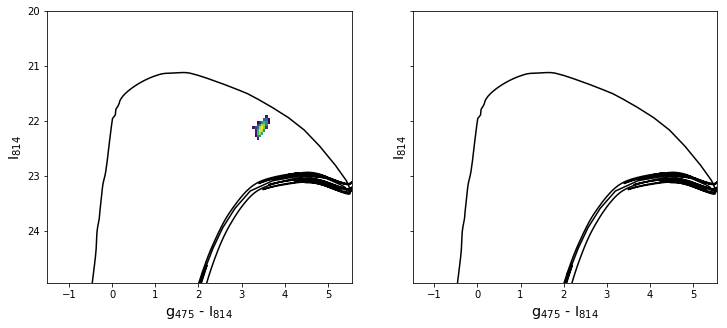

In [56]:
pcmd_true, pcmd_model, bins, fig, axes =  compare_model_to_truth('mock_4', bins=bins)

In [50]:
pcmd_true

array([[22.117897 , 22.095848 , 22.157034 , ..., 22.09481  , 22.119596 ,
        22.15181  ],
       [ 3.4711094,  3.4685955,  3.4481773, ...,  3.488491 ,  3.4782028,
         3.4524956]], dtype=float32)

In [51]:
pcmd_model

array([[59.302986 , 59.302986 , 59.302986 , ..., 59.302986 , 59.302986 ,
        33.550407 ],
       [ 0.7448845,  0.7448845,  0.7448845, ...,  0.7448845,  0.7448845,
        26.497463 ]], dtype=float32)

In [13]:
driv.initialize_data(pcmd_true, bins=bins)

In [24]:
_, hess_model, err_model = ppy.utils.make_hess(pcmd_model, bins=bins)
combined_var = (driv.err_data**2. + err_model**2.)
# combined_var[(driv.hess_data + hess_model) <= 0.0] = 0.0

In [25]:
hess_diff = (hess_model - driv.hess_data)

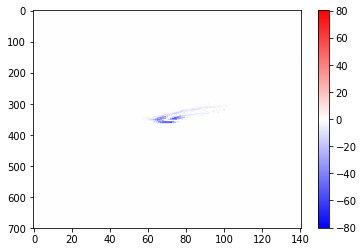

In [42]:
x = -np.abs((np.sign(hess_diff) * (hess_diff**2 / (2.*combined_var)))[0])
plt.imshow(x, aspect='auto', cmap='bwr', norm=mpl.colors.Normalize(vmin=-np.max(np.abs(x)), vmax=np.max(np.abs(x))))
plt.colorbar()

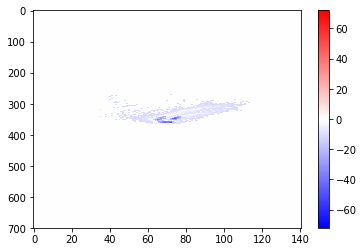

In [43]:
x = -np.abs((np.sign(hess_diff) * norm.logpdf(hess_model, loc=driv.hess_data, scale=np.sqrt(combined_var)))[0])
plt.imshow(x, aspect='auto', cmap='bwr', norm=mpl.colors.Normalize(vmin=-np.max(np.abs(x)), vmax=np.max(np.abs(x))))
plt.colorbar()

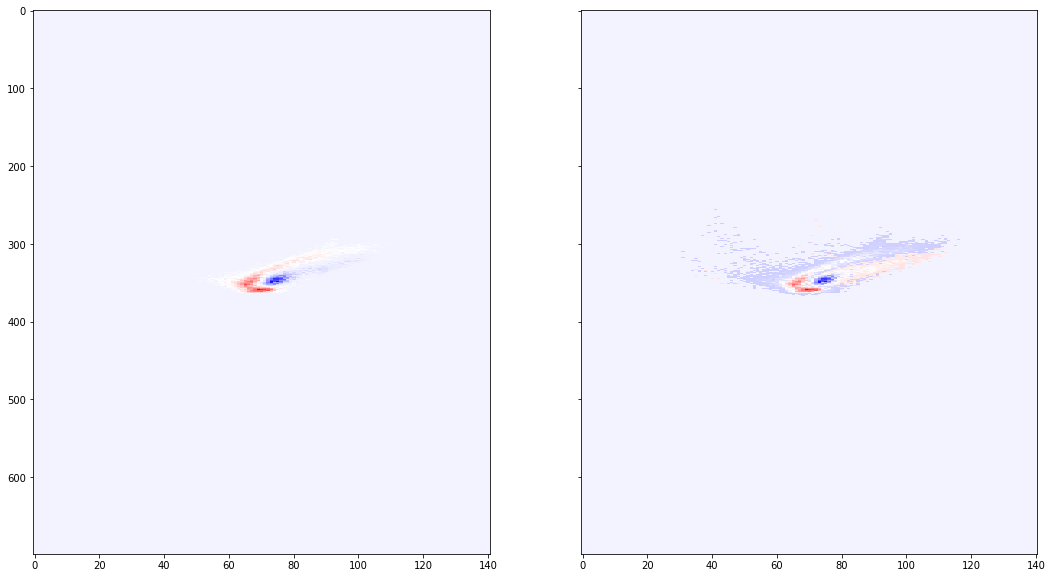

In [41]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(18, 10))
axes[0].imshow(driv.loglike_map(pcmd_model, like_mode=2, signed=True)[0], aspect='auto', cmap='bwr')
axes[1].imshow(driv.loglike_map(pcmd_model, like_mode=3, signed=True)[0], aspect='auto', cmap='bwr')
